In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [10]:
df_pr = pd.read_csv("pr_reviews_Gnucash.csv")

In [11]:
df_pr.columns = [
  "author_login",
  "author_association",
  "body",
  "submitted_at",
  "includes_created_edit",
  "state"
]


In [12]:
df_pr

,author_login,author_association,body,submitted_at,includes_created_edit,state
0,jralls,MEMBER,I don't think the chart is particularly useful...,2024-09-23T19:20:51Z,False,COMMENTED
1,gjanssens,MEMBER,NaN,2024-09-13T16:24:59Z,False,COMMENTED
2,gjanssens,MEMBER,NaN,2024-09-13T16:35:12Z,False,CHANGES_REQUESTED
3,jralls,MEMBER,NaN,2024-09-13T17:06:29Z,False,COMMENTED
4,christopherlam,CONTRIBUTOR,NaN,2024-09-13T23:57:58Z,False,COMMENTED
...,...,...,...,...,...,...
3656,gjanssens,MEMBER,NaN,2016-10-12T19:06:48Z,False,COMMENTED
3657,jralls,MEMBER,NaN,2016-10-12T21:03:01Z,False,COMMENTED
3658,gjanssens,MEMBER,NaN,2016-10-12T21:11:13Z,False,COMMENTED
3659,jralls,MEMBER,NaN,2016-10-13T07:54:22Z,False,COMMENTED


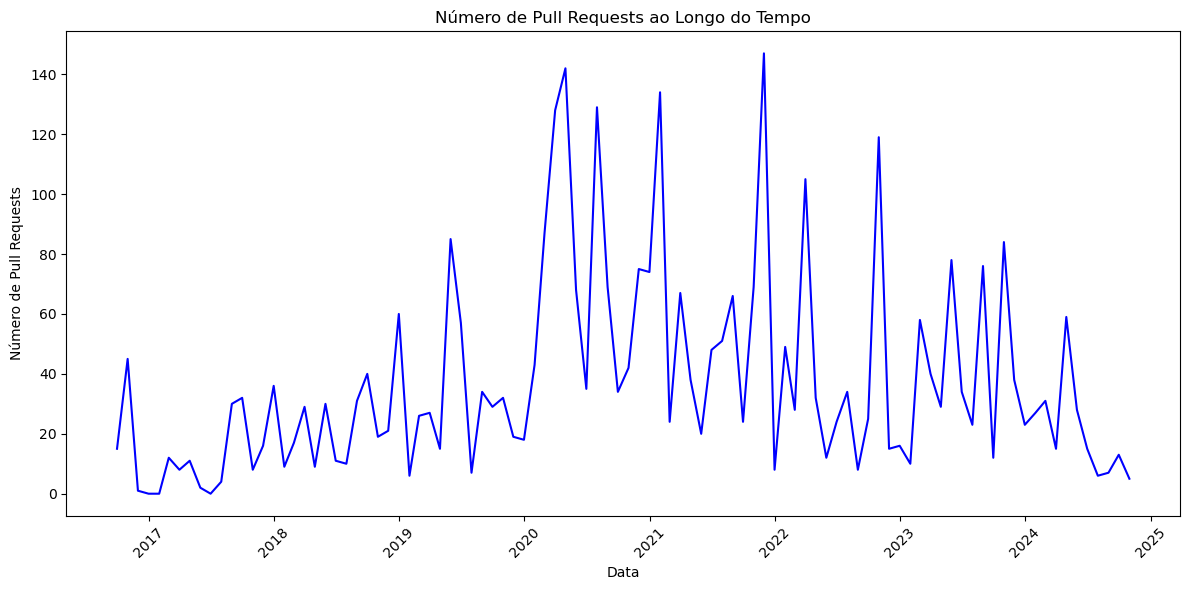

In [6]:
# Converter a coluna de data para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'], errors='coerce')

# Remover linhas onde a conversão falhou (se houver)
df_pr = df_pr.dropna(subset=['submitted_at'])

# Definir a coluna de data como índice
df_pr.set_index('submitted_at', inplace=True)

# Agrupar por mês e contar o número de pull requests
monthly_pull_requests = df_pr.resample('M').size()

# Plotar o gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_pull_requests.index, y=monthly_pull_requests.values, marker='', color='blue')
plt.title('Número de Pull Requests ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Número de Pull Requests')
plt.xticks(rotation=45)
plt.tight_layout()

# Exibir o gráfico
plt.show()


In [7]:
contagem_nomes_df = df_pr['author_login'].value_counts().reset_index()
contagem_nomes_df.columns = ['author_login', 'frequencia']
print(contagem_nomes_df)


      author_login  frequencia
0           jralls        1097
1        gjanssens         595
2   christopherlam         547
3           Bob-IT         390
4           fellen         329
..             ...         ...
90      BrianRater           1
91        user8446           1
92      yselkowitz           1
93  nabijaczleweli           1
94       uniederer           1

[95 rows x 2 columns]


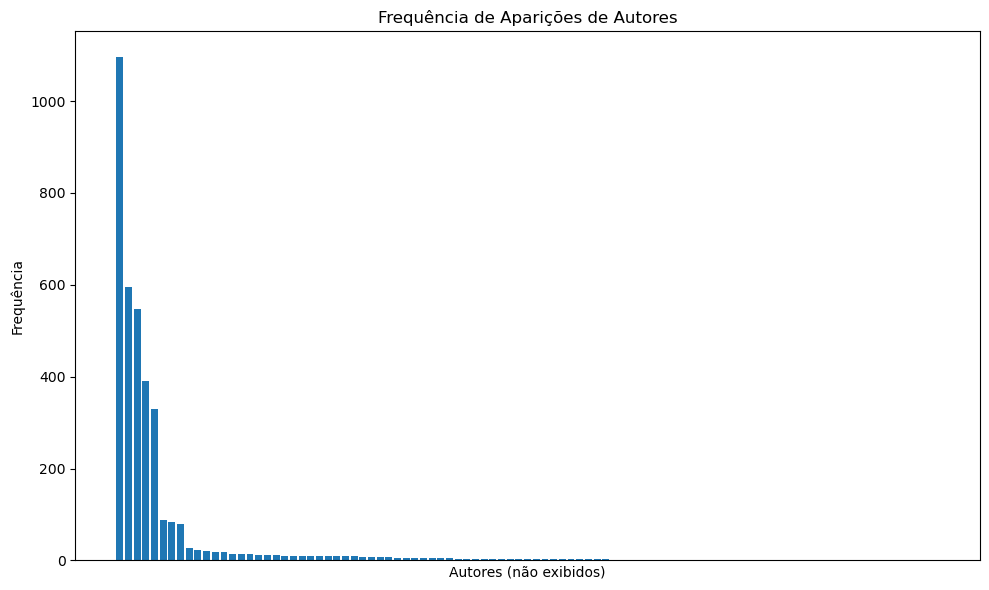

In [8]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['author_login'], contagem_nomes_df['frequencia'])

# Adicionar rótulos e título
plt.xlabel('Autores (não exibidos)')
plt.ylabel('Frequência')
plt.title('Frequência de Aparições de Autores')

# Remover os nomes do eixo X
plt.xticks([])

# Exibir o gráfico
plt.tight_layout()
plt.show()


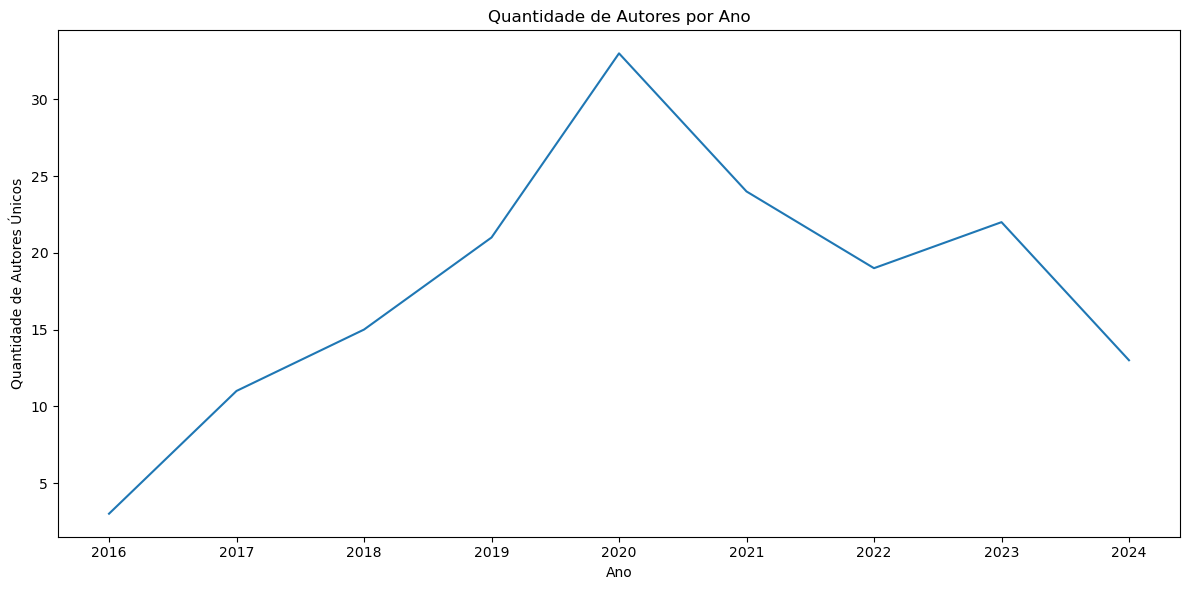

In [13]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar o número de autores únicos por ano
authors_per_year = df_pr.groupby('year')['author_login'].nunique()

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))
plt.plot(authors_per_year.index, authors_per_year.values, marker='', linestyle='-')
plt.title('Quantidade de Autores por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Autores Únicos')
plt.xticks(authors_per_year.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [14]:
contagem_nomes_df = df_pr['author_association'].value_counts().reset_index()
contagem_nomes_df.columns = ['author_association', 'frequencia']
print(contagem_nomes_df)


  author_association  frequencia
0             MEMBER        2027
1        CONTRIBUTOR        1494
2               NONE         140


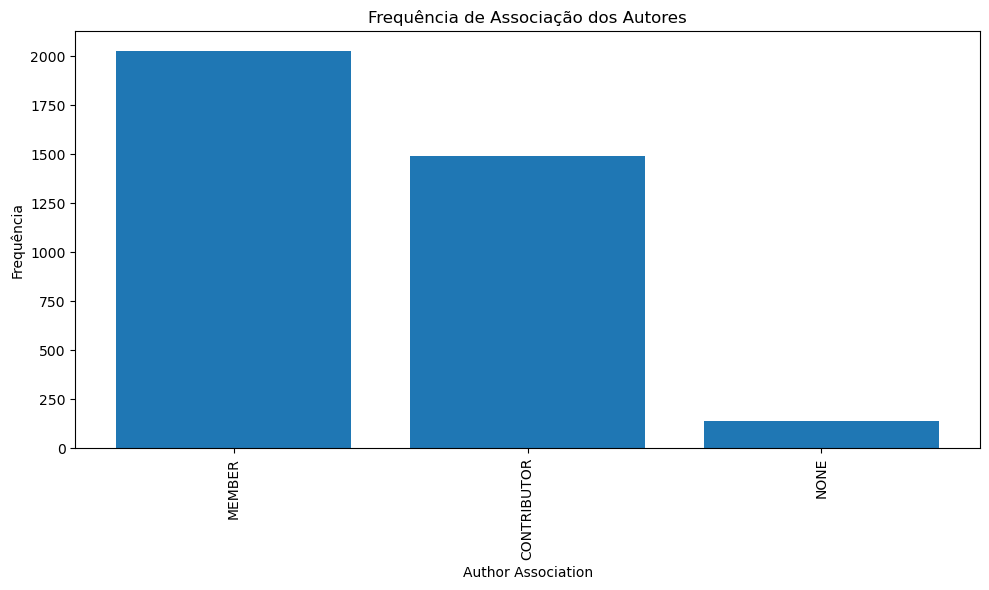

In [15]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['author_association'], contagem_nomes_df['frequencia'])

# Adicionar rótulos
plt.xlabel('Author Association')
plt.ylabel('Frequência')
plt.title('Frequência de Associação dos Autores')
plt.xticks(rotation=90)  # Rotacionar os nomes no eixo x para melhor visualização

# Exibir o gráfico
plt.tight_layout()
plt.show()

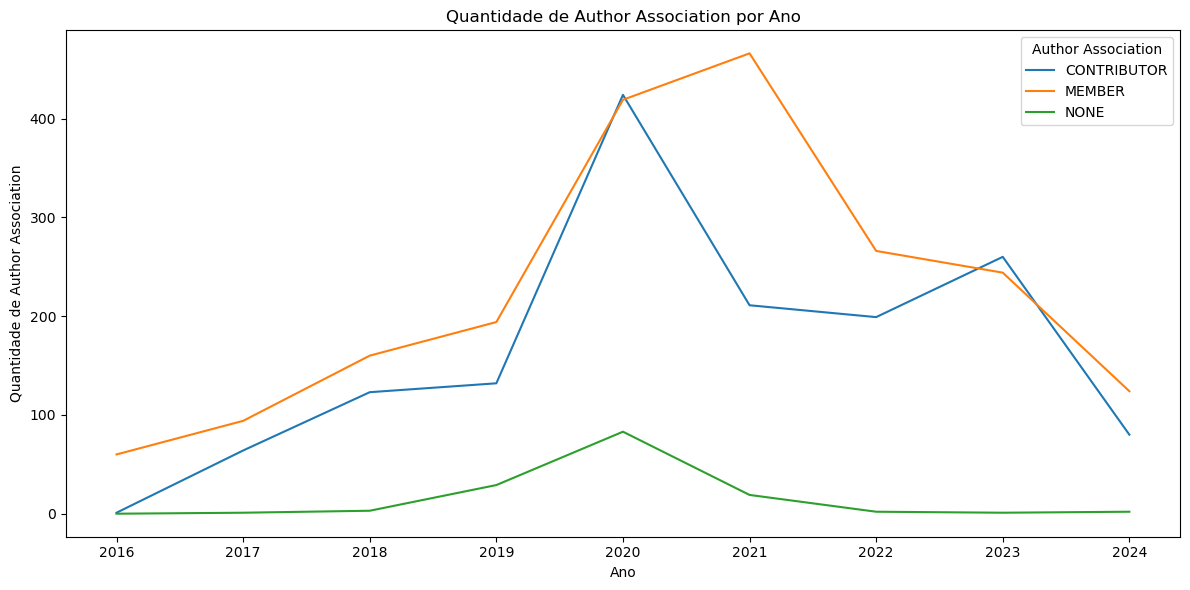

In [16]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar a quantidade de author_association únicos por ano
association_counts = df_pr.groupby(['year', 'author_association']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for association in association_counts.columns:
    plt.plot(association_counts.index, association_counts[association], marker='', linestyle='-', label=association)

plt.title('Quantidade de Author Association por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Author Association')
plt.xticks(association_counts.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)
plt.legend(title='Author Association')
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [17]:
contagem_nomes_df = df_pr['state'].value_counts().reset_index()
contagem_nomes_df.columns = ['state', 'frequencia']
print(contagem_nomes_df)


               state  frequencia
0          COMMENTED        3281
1  CHANGES_REQUESTED         248
2           APPROVED         128
3          DISMISSED           4


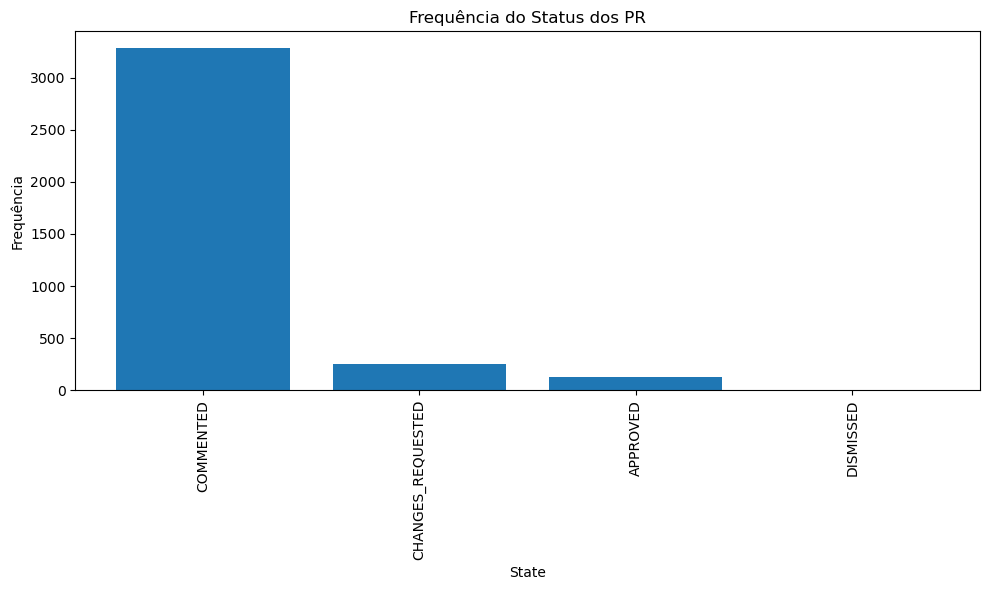

In [18]:
# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(contagem_nomes_df['state'], contagem_nomes_df['frequencia'])

# Adicionar rótulos
plt.xlabel('State')
plt.ylabel('Frequência')
plt.title('Frequência do Status dos PR')
plt.xticks(rotation=90)  # Rotacionar os nomes no eixo x para melhor visualização

# Exibir o gráfico
plt.tight_layout()
plt.show()


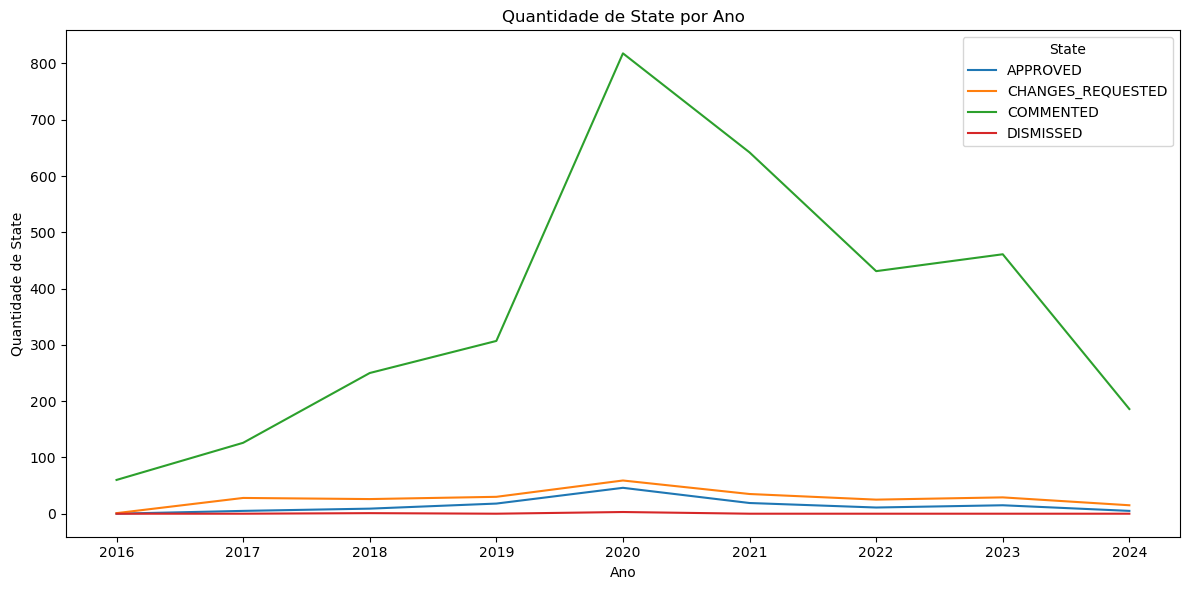

In [19]:
# Converter a coluna 'submitted_at' para datetime
df_pr['submitted_at'] = pd.to_datetime(df_pr['submitted_at'])

# Extrair o ano da coluna 'submitted_at'
df_pr['year'] = df_pr['submitted_at'].dt.year

# Contar a quantidade de states por ano
state_counts = df_pr.groupby(['year', 'state']).size().unstack(fill_value=0)

# Plotar o gráfico de linhas
plt.figure(figsize=(12, 6))

for state in state_counts.columns:
    plt.plot(state_counts.index, state_counts[state], marker='', linestyle='-', label=state)

plt.title('Quantidade de State por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de State')
plt.xticks(state_counts.index)  # Para garantir que todos os anos sejam mostrados
plt.grid(False)  
plt.legend(title='State')
plt.tight_layout()

# Exibir o gráfico
plt.show()